
# Story Telling : Using Data Visualisation with Python
2 years down the line, when we look back and try to explain the pandemic, I'm sure a few charts would come handy. 


# Steps
1.   Find a good data source. 
2.   Decide on the objective of your charts
3. Find a suitable library to plot what you want to see. Take inspirations from examples. 
4.   Change the data you obtained to fit the library requirements. 
5. Plot the chart and tell the story.


#Visualisation types


1.   Line chart 
a) using Pandas b) using Matplotlib
2. Tabular data
3.   Bar chart
4. Stacked bars
5. 3D Scatter plot 
6. Scatter plot -World map
7. Chloropleth Map 





In [ ]:
#Daily rise of Covid cases plot a line

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
#%matplotlib inline #if you're working in a Jupyter notebook

# Section 2 - Loading and Selecting Data
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
30827,2020-07-03,West Bank and Gaza,3334,463,11
30828,2020-07-03,Western Sahara,10,8,1
30829,2020-07-03,Yemen,1240,536,335
30830,2020-07-03,Zambia,1632,1348,30


Text(2020-01-23 00:00:00, -100000, 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv')

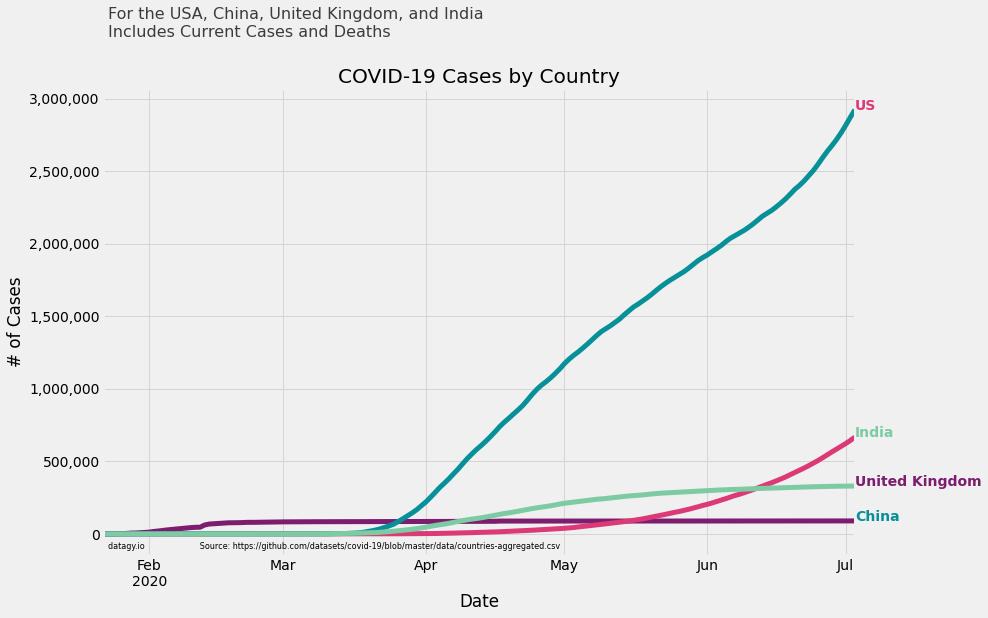

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
#%matplotlib inline #if you're working in a Jupyter notebook

# Section 2 - Loading and Selecting Data
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
df.head()
countries = ['United Kingdom', 'US', 'China', 'India',]
df = df[df['Country'].isin(countries)]
df.head(5)
# Section 3 - Creating a Summary Column
df['Cases'] = df[['Confirmed', 'Deaths']].sum(axis=1)
df = df.pivot(index='Date', columns='Country', values='Cases')
countries = list(df.columns)
covid = df.reset_index('Date')
covid.set_index(['Date'], inplace=True)
covid.columns = countries

# Section 5 - Calculating Rates per 100,000
populations = {'United Kingdom': 67802690 , 'US': 330548815, 'China':1438027228, 'India': 1352600000}
percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*100000
colors = {'United Kingdom':'#7C1D6F', 'US':'#DC3977', 'China':'#089099', 'India':'#7CCBA2'}
plt.style.use('fivethirtyeight') #this adds the grid lines and the weight of the tickers - We used Matplotlib.style.use to add "fivethirtyeight" to this chart

# Section 7 - Creating the Visualization
plot = covid.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False, title="COVID-19 Cases by Country")
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('# of Cases')

# Section 8 - Assigning Colour
for country in list(colors.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country, weight = 'bold')

# Section 9 - Adding Labels
# plot.text(x = covid.index[1], y = int(covid.max().max())+45000, s = "COVID-19 Cases by Country", fontsize = 23, weight = 'bold', alpha = .25)
plot.text(x = covid.index[1], y = int(covid.max().max())+505000, s = "For the USA, China, United Kingdom, and India \nIncludes Current Cases and Deaths", fontsize = 16, alpha = .75)
plot.text(x = percapita.index[1], y = -100000,s = 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', fontsize = 8)

# Line chart using Matplotlib


In [ ]:
data = pd.read_csv('/content/drive/My Drive/code-along/case_time_series (2).csv') 
data

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0
...,...,...,...,...,...,...,...
100,09 May,3175,62865,1414,19301,115,2101
101,10 May,4311,67176,1669,20970,112,2213
102,11 May,3592,70768,1579,22549,81,2294
103,12 May,3562,74330,1905,24454,120,2414


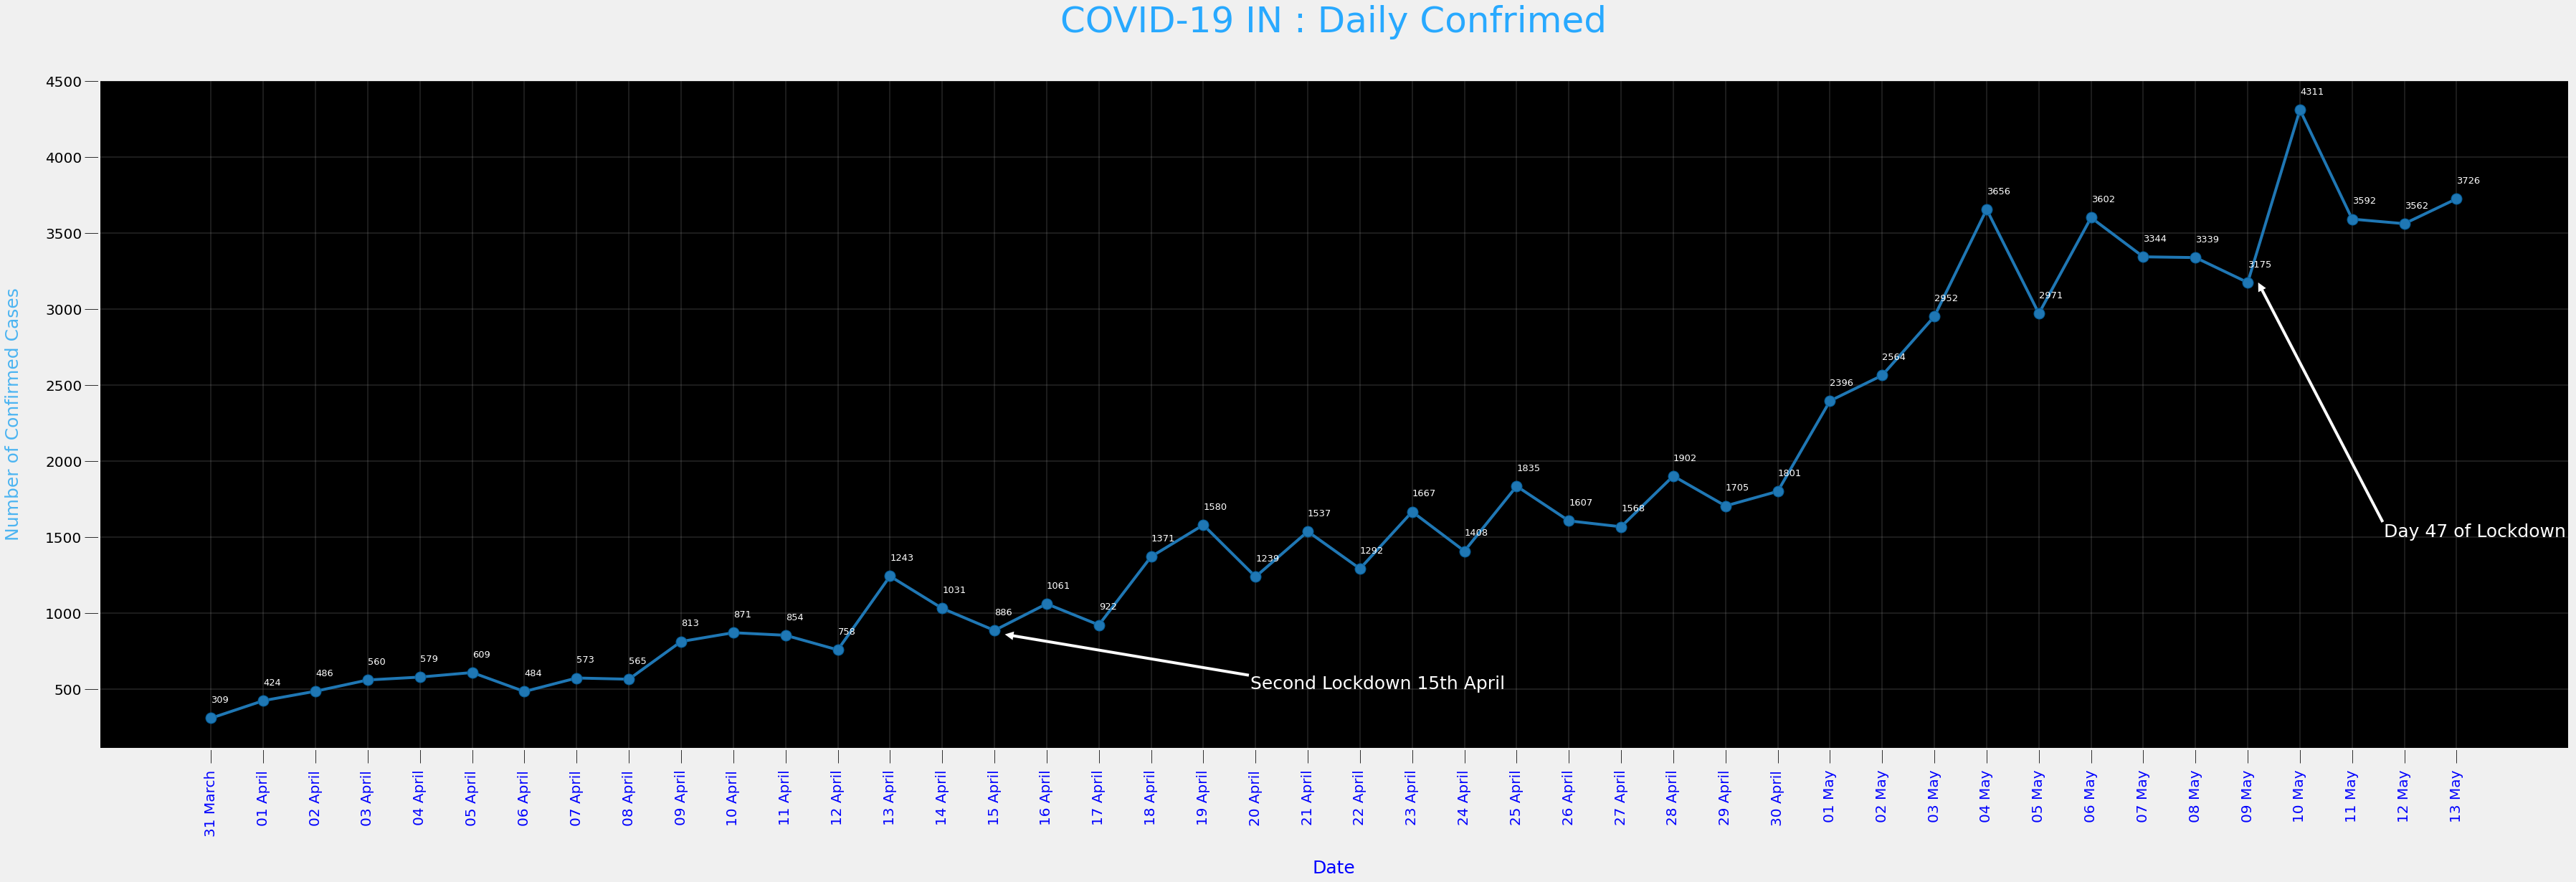

In [ ]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
  
data = pd.read_csv('/content/drive/My Drive/code-along/case_time_series (2).csv') 

Y = data.iloc[61:,1].values  
R = data.iloc[61:,3].values  
D = data.iloc[61:,5].values  
X = data.iloc[61:,0]  
  
plt.figure(figsize=(55,16)) 
  
ax = plt.axes() 
ax.grid(linewidth=0.4, color='#8f8f8f')  
  
ax.set_facecolor("black")  
ax.set_xlabel('\nDate',size=25,color='blue') 
ax.set_ylabel('Number of Confirmed Cases\n', 
              size=25,color='#4bb4f2') 
  
plt.xticks(rotation='vertical',size='20',color='blue') 
plt.yticks(size=20,color='black') 
plt.tick_params(size=20,color='black') 


for i,j in zip(X,Y): 
    ax.annotate(str(j),xy=(i,j+100),color='white',size='13') 
      
ax.annotate('Second Lockdown 15th April', 
            xy=(15.2, 860), 
            xytext=(19.9,500), 
            color='white', 
            size='25', 
            arrowprops=dict(color='white', 
                            linewidth=0.025)) 

      
ax.annotate('Day 47 of Lockdown ', 
            xy=(39.2, 3175), 
            xytext=(41.6,1500), 
            color='white', 
            size='25', 
            arrowprops=dict(color='white', 
                            linewidth=0.025)) 

plt.title("COVID-19 IN : Daily Confrimed\n", 
          size=50,color='#28a9ff') 
  
ax.plot(X,Y, 
        color='#1F77B4', 
        marker='o', 
        linewidth=4, 
        markersize=15, 
        markeredgecolor='#035E9B')

# Stacked bar charts using Mathplotlib


In [ ]:
data = pd.read_csv('/content/district.csv') 
data.head() 

,districtData/0/district,blank,districtData/0/active,districtData/0/confirmed,districtData/0/deceased,districtData/0/recovered
0,Ahmadnagar,NaN,17.0,42.0,2.0,23.0
1,Yavatmal,NaN,69.0,79.0,0.0,10.0
2,Washim,NaN,1.0,2.0,0.0,1.0
3,Solapur,NaN,93.0,99.0,6.0,0.0
4,Sindhudurg,NaN,1.0,2.0,0.0,1.0


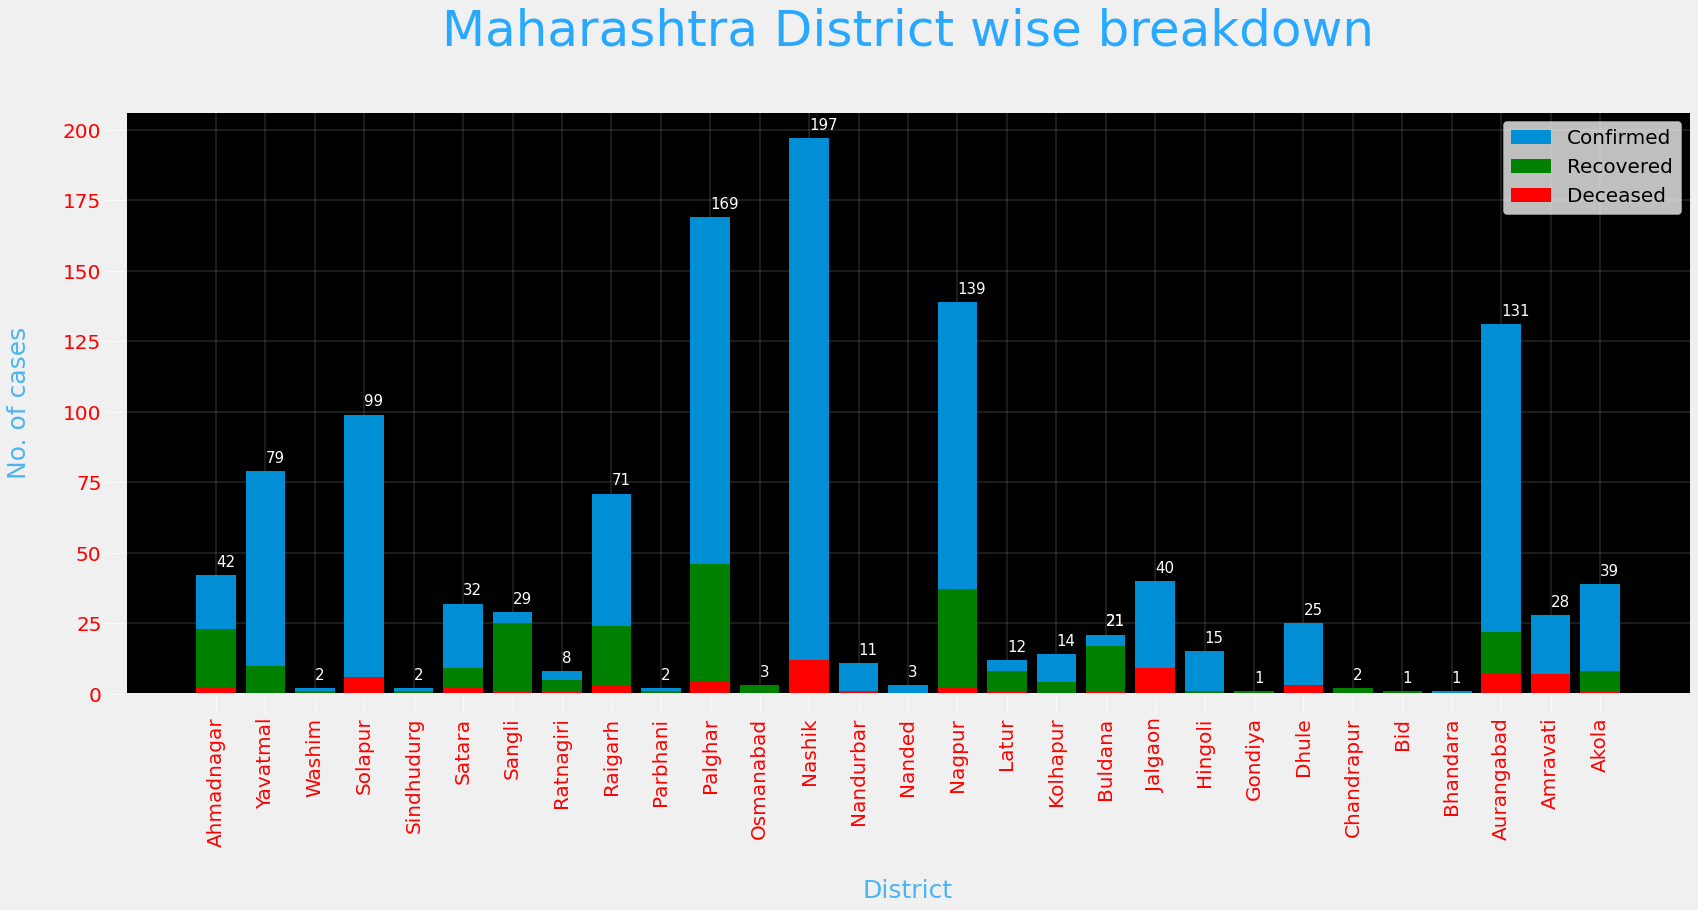

In [ ]:
  
re=data.iloc[:30,5].values 
de=data.iloc[:30,4].values 
co=data.iloc[:30,3].values 
x=list(data.iloc[:30,0]) 
  
plt.figure(figsize=(25,10)) 
ax=plt.axes() 
  
ax.set_facecolor('black') 
ax.grid(linewidth=0.4, color='#8f8f8f') 
  
  
plt.xticks(rotation='vertical', 
           size='20', 
           color='red')#ticks of X 
  
plt.yticks(size='20',color='red') 
  
  
ax.set_xlabel('\nDistrict',size=25, 
              color='#4bb4f2') 
ax.set_ylabel('No. of cases\n',size=25, 
              color='#4bb4f2') 
  
  
plt.tick_params(size=20,color='white') 
  
  
ax.set_title('Maharashtra District wise breakdown\n', 
             size=50,color='#28a9ff') 
  
plt.bar(x,co,label='re') 
plt.bar(x,re,label='re',color='green') 
plt.bar(x,de,label='re',color='red') 
  
for i,j in zip(x,co): 
    ax.annotate(str(int(j)), 
                xy=(i,j+3), 
                color='white', 
                size='15') 
  
plt.legend(['Confirmed','Recovered','Deceased'], 
           fontsize=20)

# Tabular graph using Pandas

In [ ]:

# =============

# read data
states_latest = pd.read_csv('/content/drive/My Drive/code-along/datasets_549966_1296705_state_level_latest.csv')

# remove the row containing 'Total'
states_latest = states_latest[states_latest['State']!='Total']

# mortality rate
states_latest['Mortality Rate'] = round((states_latest['Deaths'] / states_latest['Confirmed'])*100, 2)

# recovery rate
states_latest['Recovery Rate'] = round((states_latest['Recovered'] / states_latest['Confirmed'])*100, 2)

# first few rows
states_latest.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes,Mortality Rate,Recovery Rate
1,Maharashtra,169883,88960,7610,73298,29/06/2020 19:54:14,15,MH,0,0,0,15 cases were marked as non-covid deaths in MH...,4.48,52.37
2,Tamil Nadu,86224,47749,1141,37334,29/06/2020 18:50:15,0,TN,0,0,0,2 deaths cross notified to other states from C...,1.32,55.38
3,Delhi,85161,56235,2680,26246,29/06/2020 21:46:14,0,DL,0,0,0,"Delhi bulletins in the morning, containing dat...",3.15,66.03
4,Gujarat,32023,23248,1828,6947,29/06/2020 20:26:16,0,GJ,0,0,0,NaN,5.71,72.60
5,Uttar Pradesh,22828,15506,672,6650,29/06/2020 21:55:14,0,UP,0,0,0,NaN,2.94,67.93


In [ ]:
latest = states_latest.sort_values('Confirmed', ascending=False).reset_index(drop=True)

# remove 'State Unassigned' row
latest = latest[latest['State']!='State Unassigned']

# rearrange columns
latest = latest.loc[:, ['State', 'Confirmed', 'Active', 'Deaths', 'Mortality Rate', 'Recovered', 'Recovery Rate']]

# background color
latest.style\
    .background_gradient(cmap="Blues", subset=['Confirmed', 'Active'])\
    .background_gradient(cmap="Greens", subset=['Deaths', 'Mortality Rate'])\
    .background_gradient(cmap="Reds", subset=['Recovered', 'Recovery Rate'])

,State,Confirmed,Active,Deaths,Mortality Rate,Recovered,Recovery Rate
0,Maharashtra,169883,73298,7610,4.480000,88960,52.370000
1,Tamil Nadu,86224,37334,1141,1.320000,47749,55.380000
2,Delhi,85161,26246,2680,3.150000,56235,66.030000
3,Gujarat,32023,6947,1828,5.710000,23248,72.600000
4,Uttar Pradesh,22828,6650,672,2.940000,15506,67.930000
5,West Bengal,17907,5535,653,3.650000,11719,65.440000
6,Rajasthan,17754,3397,409,2.300000,13948,78.560000
7,Telangana,15394,9559,253,1.640000,5582,36.260000
8,Karnataka,14295,6380,226,1.580000,7685,53.760000
9,Haryana,14210,4476,232,1.630000,9502,66.870000


# 3D Scatter plot using Plotly express for state-wise data

In [ ]:
pip install plotly_express

In [ ]:
import plotly.express as px
df = px.data.iris()
states_latest = pd.read_csv('/content/drive/My Drive/code-along/datasets_549966_1296705_state_level_latest.csv')
states_latest.head()
fig = px.scatter_3d(states_latest, x='Confirmed', y='Recovered', z='Deaths',
              color='State')
fig.show()

## India's Daily Level Data - Bar Chart using Plotly express
We can sometimes decide the graphs based on the kind of data we get. This data set has the following columns: 


1. Total Confirmed
2. Total Deceased
3. Total Recovered

We can create a few more columns from those for seeing things in relative.

1. Total Active
2. Deaths/ 100 Cases
3. Recovered / 100 Cases
4. Deaths / 100 Recovered 



In [ ]:
import plotly.express as px

temp = latest[['Active', 'Deaths', 'Recovered']]
cnf = '#393e46' # confirmed - grey
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan
act = '#fe9801' # active case - yellow

# rename columns
temp.columns = ['Active', 'Deaths', 'Cured']

# melt into longer format
tm = temp.melt(value_vars=['Active', 'Deaths', 'Cured'])



In [ ]:
daily = pd.read_csv('/content/drive/My Drive/code-along/datasets_549966_1296705_nation_level_daily.csv')

# convert datetime datatype
daily['Date'] = pd.to_datetime(daily['Date'] + ' 2020')

# get no. of active cases
daily['Total Active'] = daily['Total Confirmed'] - daily['Total Deceased'] - daily['Total Recovered']

# Deaths / 100 cases
daily['Deaths / 100 Cases'] = round((daily['Total Deceased'] / daily['Total Confirmed'])*100, 2)
# Recovered / 100 cases
daily['Recovered / 100 Cases'] = round((daily['Total Recovered'] / daily['Total Confirmed'])*100, 2)
# Deaths / 100 recovered
daily['Deaths / 100 Recovered'] = round((daily['Total Deceased'] / daily['Total Recovered'])*100, 2)

# first few rows
daily

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Total Active,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered
0,2020-01-30,1,1,0,0,0,0,1,0.00,0.00,NaN
1,2020-01-31,0,1,0,0,0,0,1,0.00,0.00,NaN
2,2020-02-01,0,1,0,0,0,0,1,0.00,0.00,NaN
3,2020-02-02,1,2,0,0,0,0,2,0.00,0.00,NaN
4,2020-02-03,1,3,0,0,0,0,3,0.00,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
147,2020-06-25,18205,491193,13983,285672,401,15309,190212,3.12,58.16,5.36
148,2020-06-26,18255,509448,10246,295918,381,15690,197840,3.08,58.09,5.30
149,2020-06-27,20142,529590,14229,310147,414,16104,203339,3.04,58.56,5.19
150,2020-06-28,19610,549200,11628,321775,384,16488,210937,3.00,58.59,5.12


In [ ]:
def plot_daily(col, hue):
    fig = px.bar(daily, x="Date", y=col, title=col, 
                 color_discrete_sequence=[hue])
    fig.update_layout(title=col + ' in India based on Daily level data', xaxis_title="", yaxis_title="")
    fig.show()

In [ ]:
plot_daily('Total Active', '#000000')
#Expected one of ['Date', 'Daily Confirmed', 'Total Confirmed', 
#'Daily Recovered', 'Total Recovered', 'Daily Deceased', 'Total Deceased',
# 'Total Active', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered'] 
#but received: Total Confirmed in India based on Daily level data

In [ ]:
plot_daily('Deaths / 100 Recovered', '#000000')


### Global Level data - World Map 
We can now connect to a data source which is updated in a timely fashion

In [ ]:

global_df = pd.read_csv('/content/drive/My Drive/code-along/time_series_covid19_confirmed_global.csv')
global_df


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,763,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,70,71,74,81,84,86,86,86,86,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267,276,284,291,315,328,346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,441,443,458,463,479,483,484,484,484,485,499,499,513,513,514,611,632,639,659,661,662,671,683,688,693,698,698,702,707,710,711,712,713,713,713,714,715,717,719,719
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,249,256,278,283,310,323,354,399,419,453,469,482,484,496,524,560,591,632,705,728,844,885,902,909,919,922,941,967,992,1015,1076,1089,1103,1118,1128,1158,1190,1221,1240,1248
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,87,87,87,87,106,106,106,132,132,132,132,141,141,141,141,162,162,163,176,176,176,197,197,210,210,247,247,247,265,265,272,272,272,272,272,303,303,303,309,309
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3266,3424,3563,3686,3807,3930,4013,4100,4191,4289,4370,4453,4529,4609,4690,4763,4834,4902,4971,5035,5097,5160,5221,5279,5338,5399,5457,5513,5567,5630,5691,5747,5799,5849,5900,5900,6005,6058,6058,6159


In [ ]:
pip install plotly

In [ ]:
from plotly import graph_objects as go
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go

global_df = global_df.rename(columns= {"Country/Region" : "Country", "Province/State": "Province"})

global_df['text'] = global_df['Country'] + " " + global_df["7/4/20"].astype(str)
fig = go.Figure(data = go.Scattergeo(
    lon = global_df["Long"],
    lat = global_df["Lat"],
    text = global_df["text"],
    mode = "markers",
    marker = dict(
        size = 12,
        opacity = 0.8,
        reversescale = True,
        autocolorscale = True,
        symbol = 'square',
        line = dict(
            width = 1,
            color = 'rgba(102, 102, 102)'
        ),
        cmin = 0,
        color = global_df['4/13/20'],
        cmax = global_df['4/13/20'].max(),
        colorbar_title = "COVID 19 Reported Cases"
    )
))

fig.update_layout(
    title = "COVID19 Confirmed Cases Around the World",
    geo = dict(
        scope = "world",
        showland = True,
    )
)

fig.show()

In [ ]:
df = global_df
df

,Province,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,text
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,Afghanistan 32672
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,Albania 2819
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500,Algeria 15500
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,Andorra 855
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,71,74,81,84,86,86,86,86,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267,276,284,291,315,328,346,Angola 346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,443,458,463,479,483,484,484,484,485,499,499,513,513,514,611,632,639,659,661,662,671,683,688,693,698,698,702,707,710,711,712,713,713,713,714,715,717,719,719,Sao Tome and Principe 719
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,256,278,283,310,323,354,399,419,453,469,482,484,496,524,560,591,632,705,728,844,885,902,909,919,922,941,967,992,1015,1076,1089,1103,1118,1128,1158,1190,1221,1240,1248,Yemen 1248
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,87,87,87,106,106,106,132,132,132,132,141,141,141,141,162,162,163,176,176,176,197,197,210,210,247,247,247,265,265,272,272,272,272,272,303,303,303,309,309,Comoros 309
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3424,3563,3686,3807,3930,4013,4100,4191,4289,4370,4453,4529,4609,4690,4763,4834,4902,4971,5035,5097,5160,5221,5279,5338,5399,5457,5513,5567,5630,5691,5747,5799,5849,5900,5900,6005,6058,6058,6159,Tajikistan 6159


In [ ]:
total_list = df.groupby('Country')['4/7/20'].sum().tolist()

country_list = df["Country"].tolist()
country_set = set(country_list)
country_list = list(country_set)
country_list.sort()

new_df = pd.DataFrame(list(zip(country_list, total_list)), 
               columns =['Country', 'Total_Cases'])

# colors = ["#F9F9F5", "#FAFAE6", "#FCFCCB", "#FCFCAE",  "#FCF1AE", "#FCEA7D", "#FCD97D",
#           "#FCCE7D", "#FCC07D", "#FEB562", "#F9A648",  "#F98E48", "#FD8739", "#FE7519",
#           "#FE5E19", "#FA520A", "#FA2B0A", "#9B1803",  "#861604", "#651104", "#570303",]


fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = new_df['Country'],
    z = new_df['Total_Cases'],
    text = new_df['Total_Cases'],
    # colorscale = colors,
    autocolorscale=True,
    reversescale=True,
    colorbar_title = 'Reported Covid-19 Cases',
))

fig.update_layout(
    title_text='Reported Covid-19 Cases until July 4th, 2020',
    geo=dict(
        showcoastlines=True,
    ),
)
fig.show()
#fig.write_html('first_figure.html', auto_open=True)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Resources


1.   https://www.geeksforgeeks.org/covid-19-data-visualization-using-matplotlib-in-python/
2.   https://www.kaggle.com/ranjithks/ran-coronavirus-india-in-rise-5l-cases#Exploratory-Data-Analysis
3. https://towardsdatascience.com/visualizing-worldwide-covid-19-data-using-python-plotly-maps-c0fba09a1b37

Make sure you check out the docs of any library you use: 
https://plotly.com/python/plotly-express/

Datasource drive link: https://drive.google.com/drive/folders/1fbWQgPNrrQj2x43jyyVHBvppTEETEGns?usp=sharing 


# Over to Karthika for Modelling!
